<a href="https://colab.research.google.com/github/siddhumanoj1/GoogleSearch-Analysis/blob/main/Google_Search_Analysis_Codegnan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Search Analysis**
by
*   **K. Siddhu Manoj**  214266p
    
    Bachelors in Computer Science with Cognitive System
    
    PB Siddhartha College of Arts And Science

*Approximately 3.5 billion searches are performed on Google daily, which means that approximately 40,000 searches are performed every second on Google. So Google search is a great use case for analyzing data based on search queries.*

### install **Pytrends**

*Google doesn’t give much access to the data about daily search queries, but another application of google known as Google Trends can be used for the task of Google search analysis. Google Trends provides an API that can be used to analyze the daily searches on Google. This API is known as pytrends, you can easily install it in your systems by using the pip command; pip install pytrends.*

In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### importing the necessary **Python libraries**


*   **pandas** to create a ***dataframe***
*   **TrendReq** from ***pytrends.request*** to Connect to Google
*   **matplotlib** to visualize the data.





In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import plotly.express as px
Trending_topics = TrendReq(hl='en-US', tz=360)
trends=TrendReq()

### Build **Payload**

Create a dataframe of the top 10 countries that search for the term “Cognitive computing“.
For this, we will be using the method **build_payload**, which allows storing a list of keywords that you want to search. In this, we can also specify the timeframe and the category to query the data from.

In [ ]:
kw_list=["Cognitive computing"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')


### Total Google Searches for **Cognitive computing**

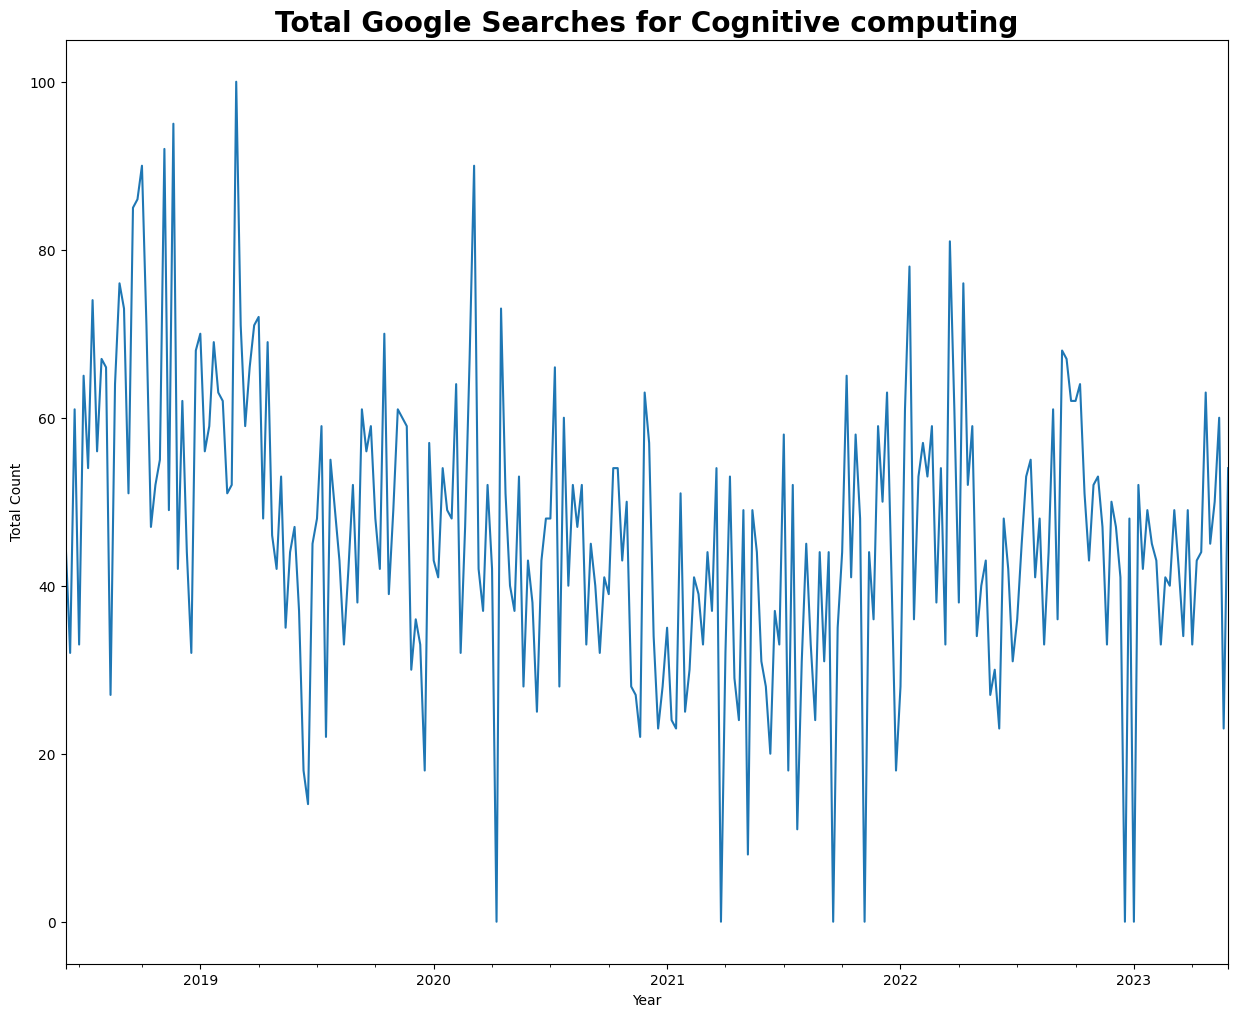

In [ ]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Cognitive computing'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(15, 12))
data['Cognitive computing'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Cognitive computing',
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

### Interest By **Region**
interest_by_region method will let us know the performance of the keyword per region. It will show results on a scale of 0-100, where 100 indicates the country with the most search and 0 indicates with least search or not enough data.

In [ ]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cognitive computing",
						ascending = False)
data = data.head(10)
print(data)


                      Cognitive computing
geoName                                  
South Africa                          100
India                                  59
South Korea                            56
United Arab Emirates                   48
Canada                                 37
Ireland                                33
Philippines                            31
Australia                              28
Thailand                               25
United Kingdom                         25


visualization in **Bar Chart**

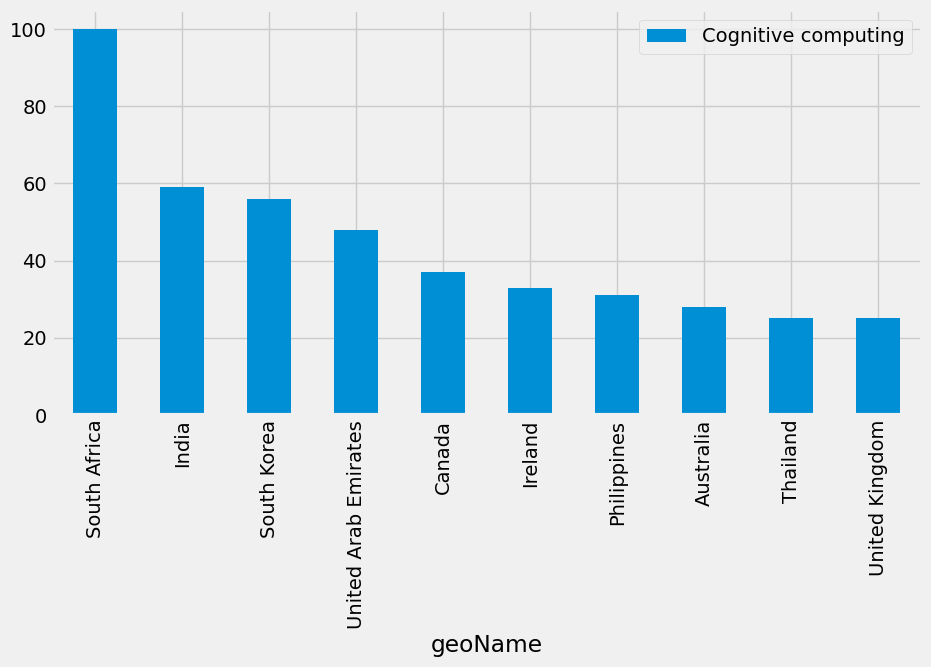

In [ ]:
data.reset_index().plot(x='geoName', y='Cognitive computing',
						figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()


### Interest Over **Time**
 interest_over_time() method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.


In [ ]:
Trending_topics.build_payload(kw_list=["Cognitive computing"],
							cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Cognitive computing", ascending = False)
data = data.head(10)
print(data)


            Cognitive computing  isPartial
date                                      
2023-04-09                  100      False
2022-10-09                   99      False
2022-09-25                   92      False
2023-04-30                   92      False
2022-10-30                   90      False
2022-11-13                   86      False
2022-11-06                   86      False
2022-09-18                   85      False
2022-08-28                   82      False
2022-07-24                   81      False


### Related **Searches** for *Cognitive Systems*


In [ ]:
Trending_topics.build_payload(kw_list=['Cognitive computing'])
related_queries = Trending_topics.related_queries()
related_queries.values()


dict_values([{'top':                                query  value
0        what is cognitive computing    100
1          cognitive cloud computing     81
2                    cloud computing     80
3                                 ai     77
4                       cognitive ai     77
5                  cognitive science     57
6                   machine learning     54
7            artificial intelligence     52
8        cognitive computing meaning     51
9                  cognitive meaning     50
10                cognitive computer     49
11                 cognitive systems     48
12           ibm cognitive computing     45
13                               ibm     45
14                          big data     42
15                  cognitive system     40
16  cognitive computing applications     34
17        ai and cognitive computing     32
18  big data and cognitive computing     31
19    cognitive computing definition     25
20                     deep learning     22
21         

In [ ]:
topic = ['Artifical intelligence','Blockchain','Cloud Computing','DevOps','IOT']

In [ ]:
trends.build_payload(kw_list=topic)
data = trends.interest_by_region(resolution='COUNTRY').sort_values(by=topic, ascending=False).head(10)
data

,Artifical intelligence,Blockchain,Cloud Computing,DevOps,IOT
geoName,,,,,
Pakistan,1,45,19,13,22
Nigeria,0,83,7,5,5
Türkiye,0,62,3,15,20
Iran,0,55,6,12,27
Switzerland,0,54,4,23,19
Spain,0,53,5,17,25
Italy,0,52,8,10,30
Argentina,0,52,6,17,25
United Arab Emirates,0,51,10,14,25


In [ ]:
px.bar(data, title='Top 10 countries with most search')

In [ ]:
from functools import reduce
#menerging all dataframes
queries = reduce(lambda left, right:
                     pd.merge(left , right,
                              how = "outer"),
                               [ai,bc,cc,do,iot])
queries


,query,value,Technology
0,chat gpt,44300,Artifical intelligence
1,chatgpt,44050,Artifical intelligence
2,internet of things,39100,Artifical intelligence
3,types of ai,27450,Artifical intelligence
4,ai in healthcare,26900,Artifical intelligence
...,...,...,...
115,arduino iot cloud,500,IOT
116,iot adalah,500,IOT
117,raspberry pi 4,450,IOT
118,blynk,450,IOT


In [ ]:
#topic related queries

trends.build_payload(kw_list=topic)
a = trends.related_queries()
ai = a['Artifical intelligence']['rising']
bc = a['Blockchain']['rising']
cc = a['Cloud Computing']['rising']
do = a['DevOps']['rising']
iot = a['IOT']['rising']

In [ ]:
ai['Technology'] = 'Artifical intelligence'
bc['Technology'] = 'Blockchain'
cc['Technology'] = 'Cloud Computing'
do['Technology'] = 'DevOps'
iot['Technology'] = 'IOT'

In [ ]:
#creating dataframe
ai = pd.DataFrame.from_dict(ai)
bc = pd.DataFrame.from_dict(bc)
cc = pd.DataFrame.from_dict(cc)
do = pd.DataFrame.from_dict(do)
iot = pd.DataFrame.from_dict(iot)

### **Keyword** Suggestions
The suggestions() method, will help you to explore what the world is searching for. It returns a list of additional suggested keywords that can be used to filter a trending search on Google.

In [ ]:
keywords = Trending_topics.suggestions(
keyword='Cognitive Computing')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')


,title,type
0,Cognitive computing,Discipline
1,Interaction Design: Beyond Human-Computer Inte...,"Book by Helen Sharp, Jenny Preece, and Yvonne ..."


In [ ]:
#Keyword Web Search Interest Over Time
data = trends.interest_over_time()
data = data.reset_index()

px.line(data, x="date", y=topic, title='Keyword Web Search Interst Over Time')

In [ ]:
#top suggestions
keywords = trends.suggestions(keyword= 'Artificial Intelligence')
ai = pd.DataFrame(keywords)
ai = ai.drop(columns='mid')
ai

,title,type
0,Artificial intelligence,Topic
1,Artificial intelligence art,Topic
2,A.I. Artificial Intelligence,2001 film
3,AIBO,Product lining
4,Artificial intelligence marketing,Topic


In [ ]:
#top suggestions
keywords = trends.suggestions(keyword= 'Internet Of Things')
iot = pd.DataFrame(keywords)
iot = iot.drop(columns='mid')
iot

,title,type
0,Internet of things,Topic
1,Industrial internet of things,Topic
2,Things Have Gotten Worse Since We Last Spoke,Book by Eric LaRocca
3,Alone with You in the Ether: A Love Story,Book by Alexene Farol Follmuth
4,Marketing 5.0: Technology for Humanity,"Book by Hermawan Kartajaya, Iwan Setiawan, and..."


In [ ]:
#top suggestions
keywords = trends.suggestions(keyword= 'Devops')
do = pd.DataFrame(keywords)
do = do.drop(columns='mid')
do

,title,type
0,DevOps,Topic
1,"The Unicorn Project: A Novel about Developers,...",Book by Gene Kim
2,DevOps For Dummies,Book by Emily Freeman
3,Ansible for DevOps: Server and Configuration M...,Book by Jeff Geerling
4,Azure DevOps Server,Topic


In [ ]:
#top suggestions
keywords = trends.suggestions(keyword= 'Cloud Computing')
cc = pd.DataFrame(keywords)
cc = cc.drop(columns='mid')
cc

,title,type
0,Cloud computing,Topic
1,Alibaba Cloud,Computer software company
2,Cloud computing security,Topic
3,IBM cloud computing,Topic
4,TransferXL - NIMBUS CLOUD COMPUTING B.V,Topic


In [ ]:
#top suggestions
keywords = trends.suggestions(keyword= 'Blockchain')
bc = pd.DataFrame(keywords)
bc = bc.drop(columns='mid')
bc

,title,type
0,Blockchain.com,Topic
1,Non-fungible token,Topic
2,Mastering Bitcoin: Programming the Open Blockc...,Book by Andreas Antonopoulos
3,Bitcoin For Dummies,Book
4,Cardano,Blockchain platform


### **Top Charts**
Top trending searches yearly. So, let us check what were the searches trending in the year 2017.

In [ ]:
df = Trending_topics.top_charts(2017, hl='en-US',
								tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Hurricane Irma,
1,iPhone 8,
2,iPhone X,
3,Matt Lauer,
4,Meghan Markle,
5,13 Reasons Why,
6,Tom Petty,
7,Fidget Spinner,
8,Chester Bennington,
9,India National Cricket Team,


In [ ]:
px.bar(ai, color='type', title='Top 5 Suggestions of AI')

In [ ]:
px.bar(bc, color='type', title='Top 5 Suggestions of Blockchain')

In [ ]:
px.bar(iot, color='type', title='Top 5 Suggestions of Iot')

In [ ]:
px.bar(do, color='type', title='Top 5 Suggestions of DevOps')

In [ ]:
px.bar(cc, color='type', title='Top 5 Suggestions of Cloud Computing')